# Importing required packages

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import scipy.stats as stat
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import *

In [35]:
data = pd.read_csv('data.csv')

In [36]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [37]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Droping the unwanted columns

In [38]:
data.drop(["id",'Unnamed: 32'], axis=1,inplace=True)

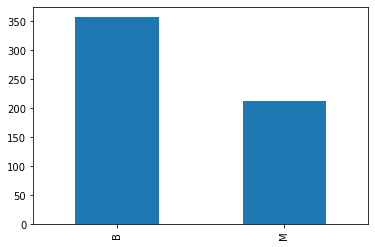

In [39]:
data["diagnosis"].value_counts().plot.bar()

In [64]:
X=data.iloc[:,1:]
y=pd.get_dummies(data["diagnosis"])["M"]

# pearson correlation

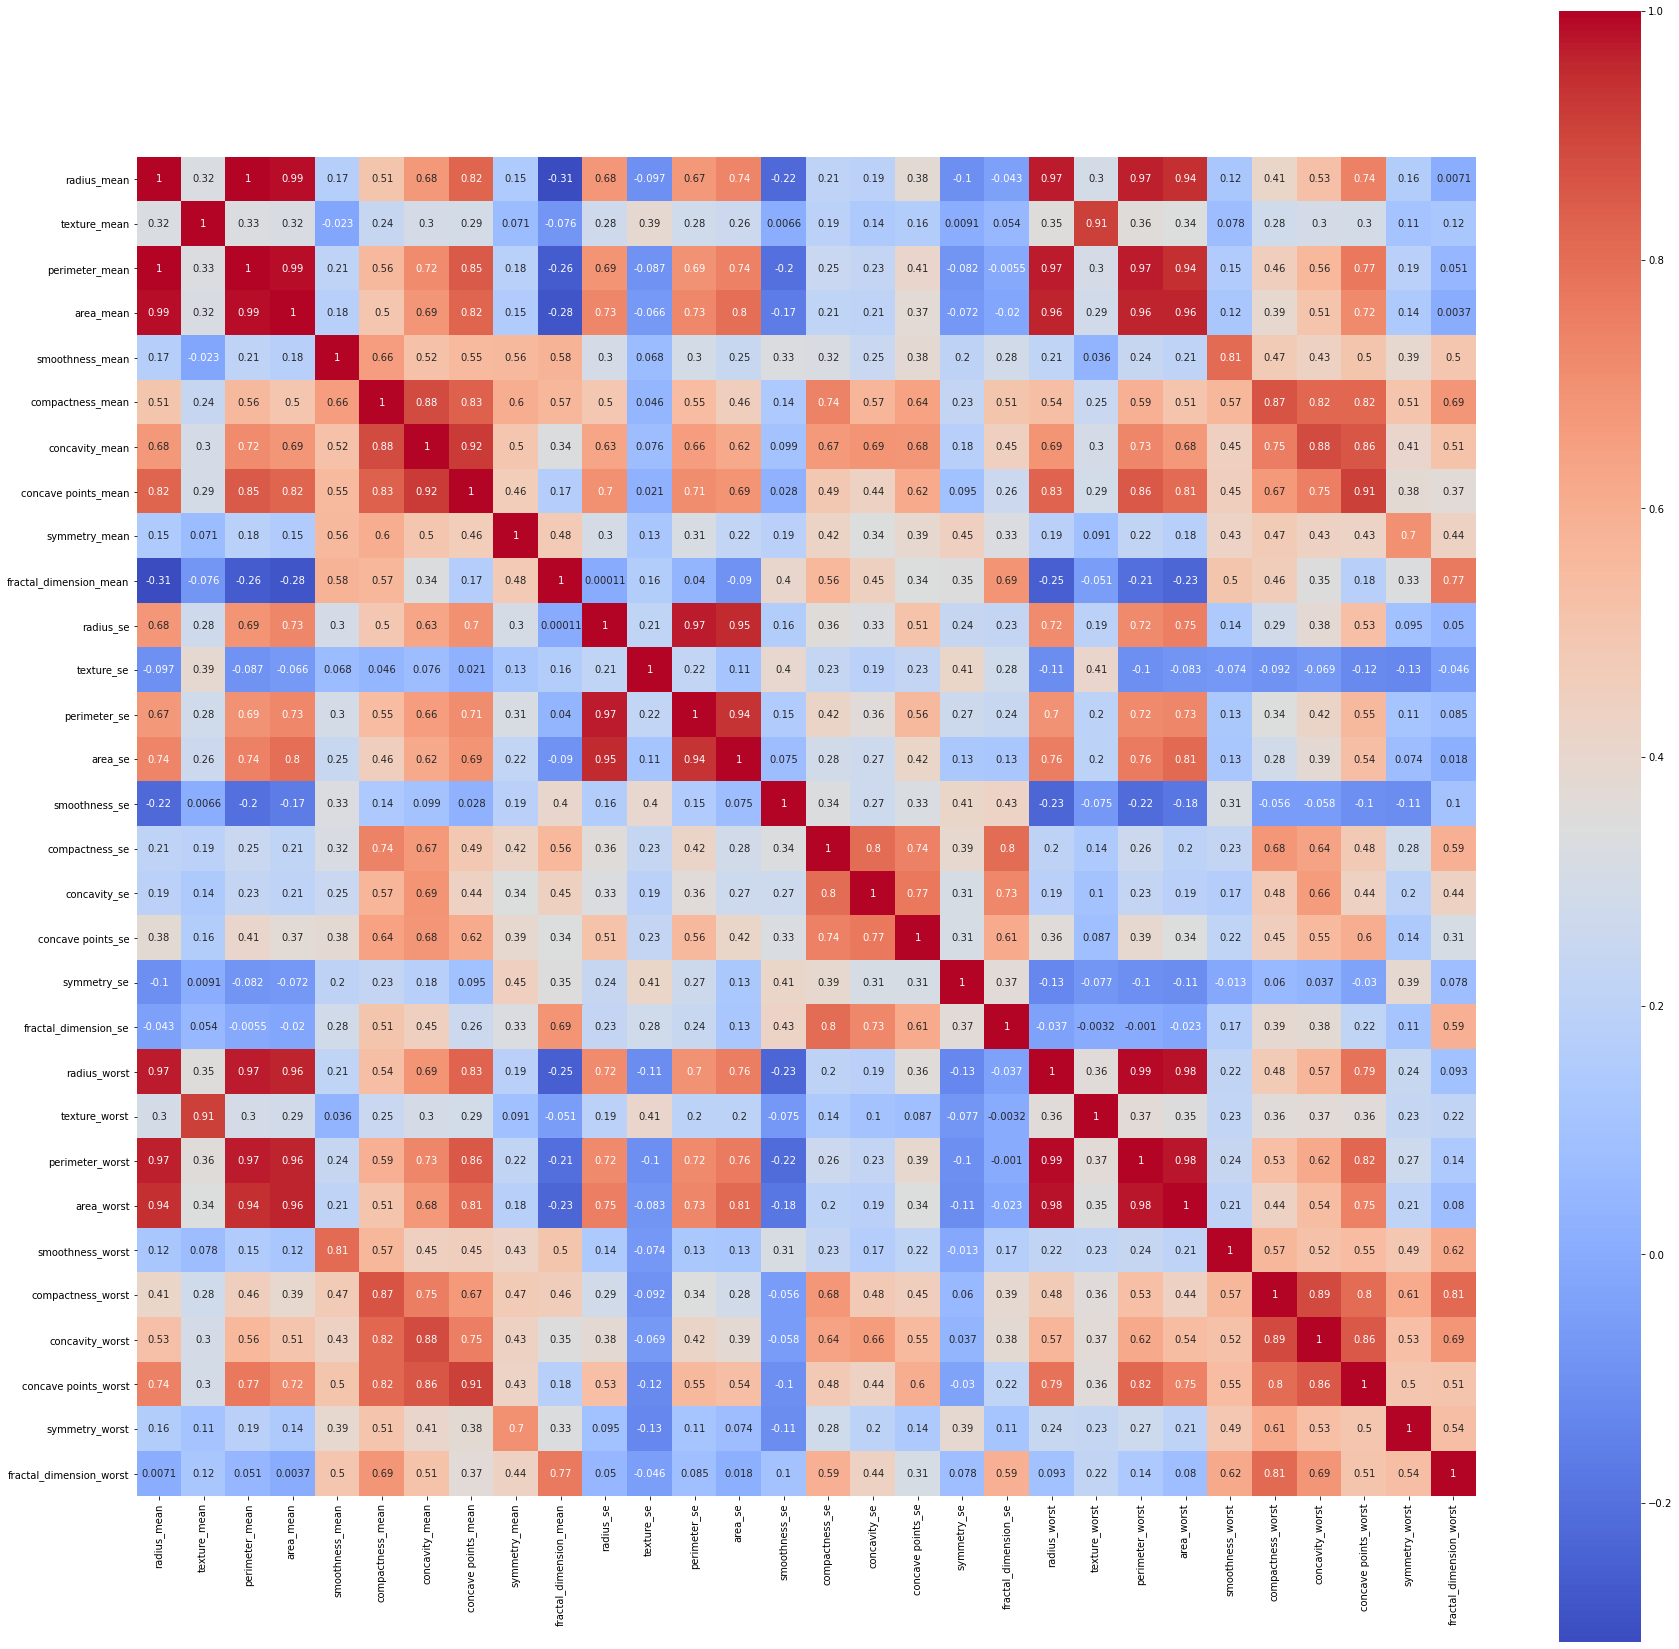

In [65]:
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

# Removing correlated columns

In [66]:
correlated_features = set()
correlation_matrix = data.corr()

In [67]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [68]:
print(correlated_features)

{'perimeter_worst', 'area_mean', 'area_se', 'radius_worst', 'texture_worst', 'area_worst', 'perimeter_se', 'perimeter_mean', 'concave points_worst', 'concave points_mean'}


In [69]:
X.drop(labels=correlated_features, axis=1, inplace=True)

# Q-Q plot

In [70]:
def plot_data(df,feature):
    print("Skewness of "+feature+" is",df[feature].skew())
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    pl.suptitle(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pl)
    plt.show()

Skewness of radius_mean is 0.9423795716730992


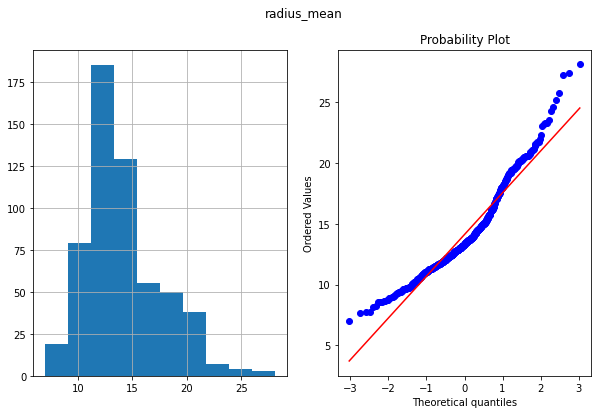

Skewness of texture_mean is 0.6504495420828159


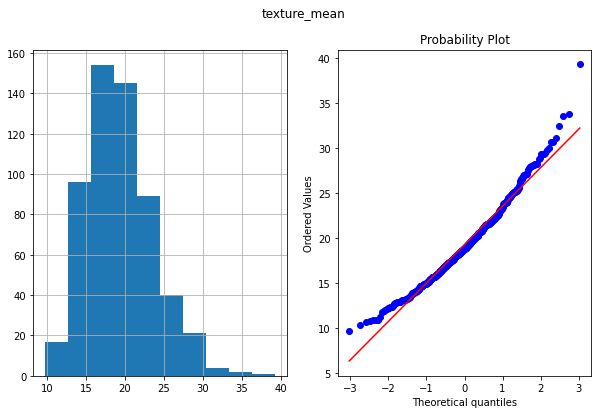

Skewness of smoothness_mean is 0.45632376481956155


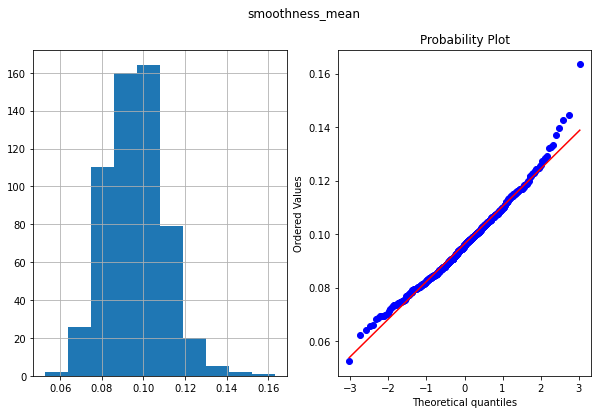

Skewness of compactness_mean is 1.1901230311980404


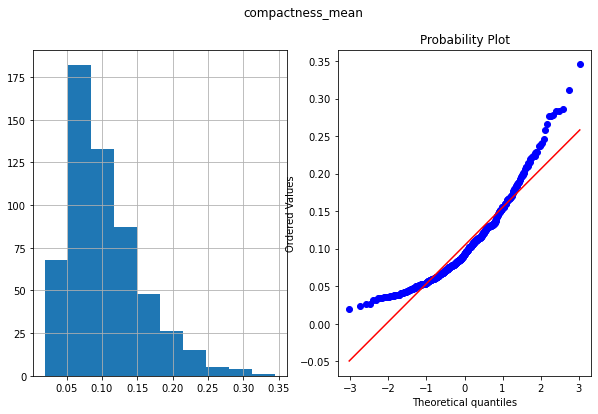

Skewness of concavity_mean is 1.4011797389486722


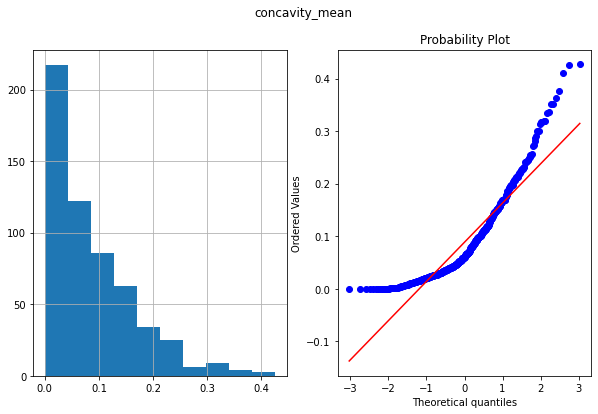

Skewness of symmetry_mean is 0.7256089733642002


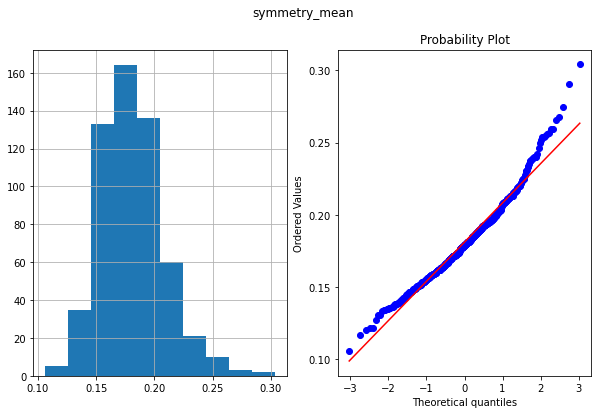

Skewness of fractal_dimension_mean is 1.3044888125755076


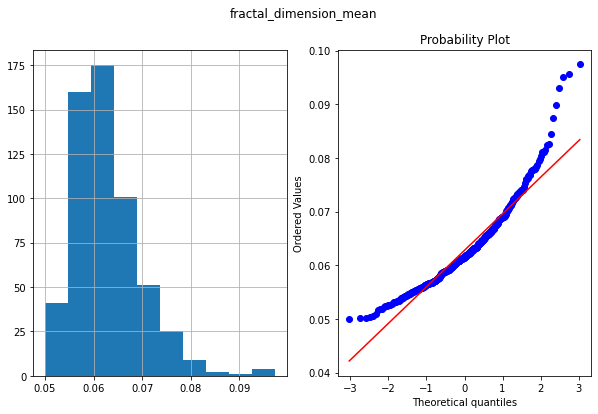

Skewness of radius_se is 3.088612166384756


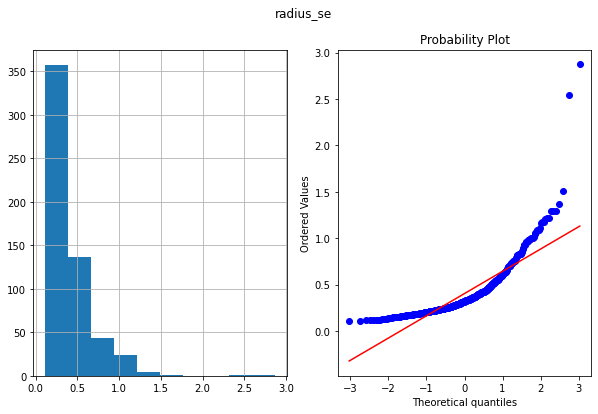

Skewness of texture_se is 1.646443808753053


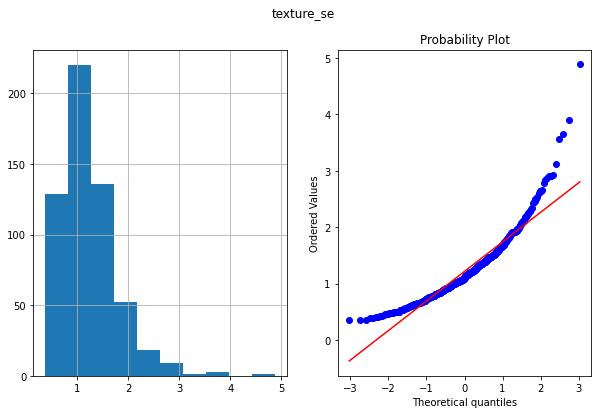

Skewness of smoothness_se is 2.314450056636761


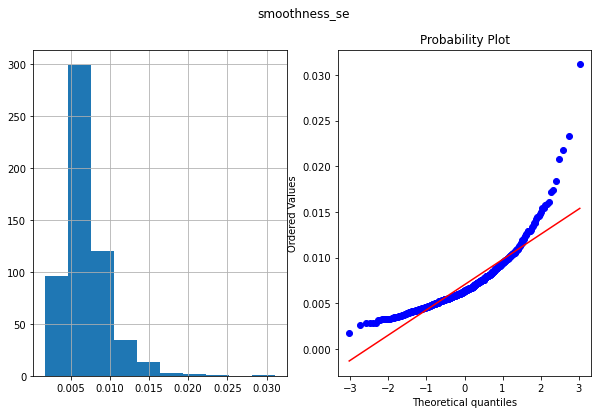

Skewness of compactness_se is 1.9022207096378565


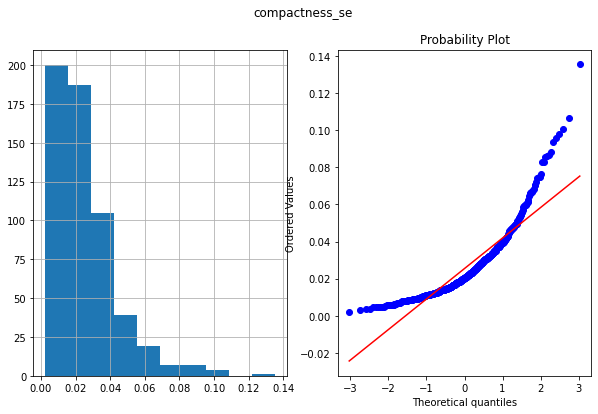

Skewness of concavity_se is 5.110463049043661


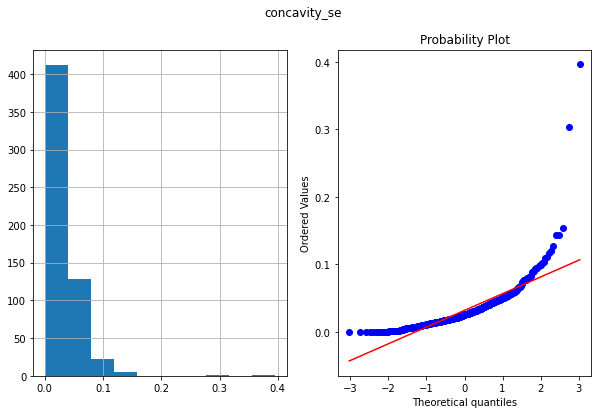

Skewness of concave points_se is 1.4446781446974788


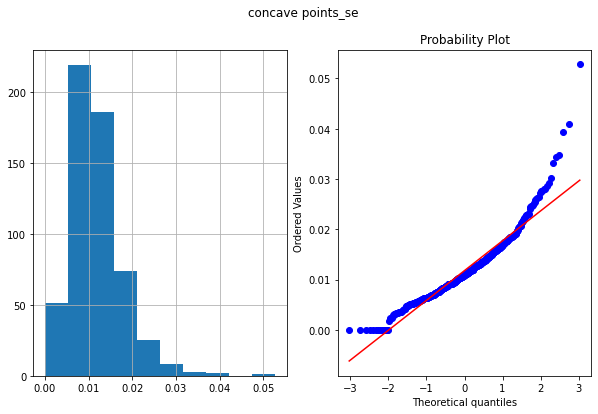

Skewness of symmetry_se is 2.195132899547822


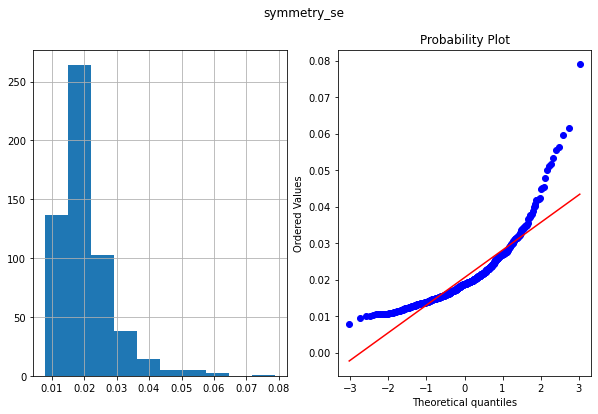

Skewness of fractal_dimension_se is 3.923968620227413


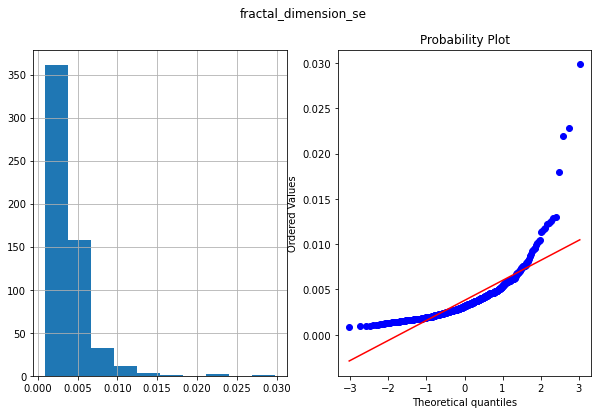

Skewness of smoothness_worst is 0.4154259962824678


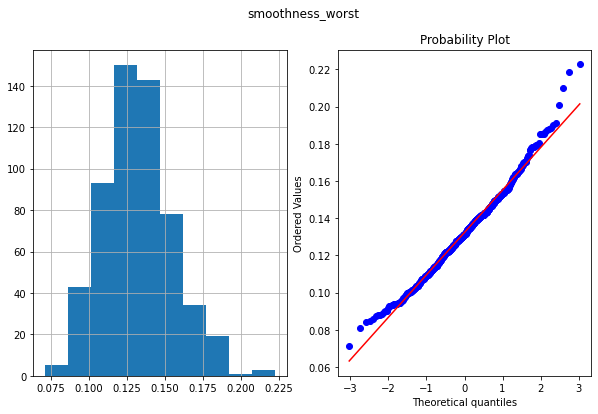

Skewness of compactness_worst is 1.4735549003297963


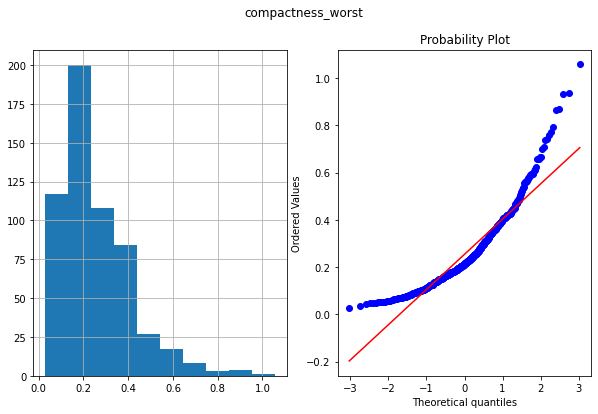

Skewness of concavity_worst is 1.1502368219460262


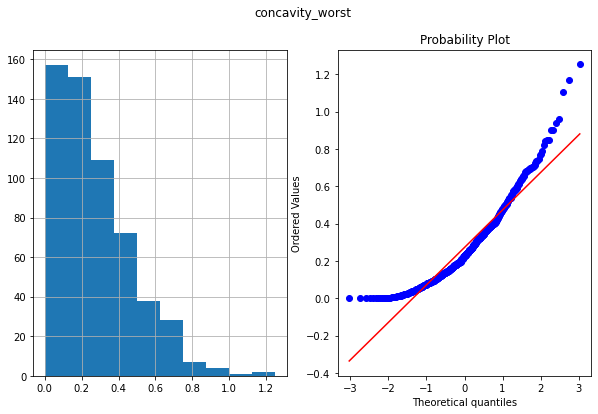

Skewness of symmetry_worst is 1.4339277651893279


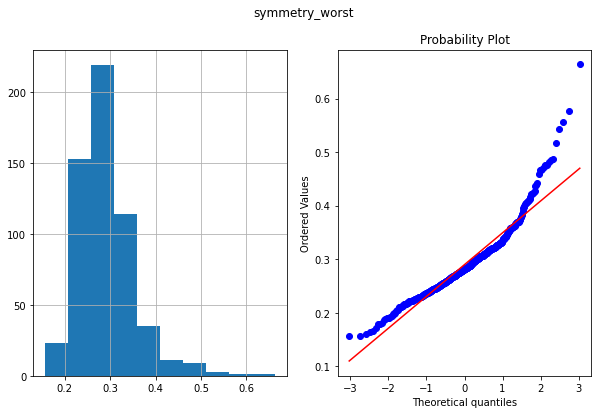

Skewness of fractal_dimension_worst is 1.6625792663955172


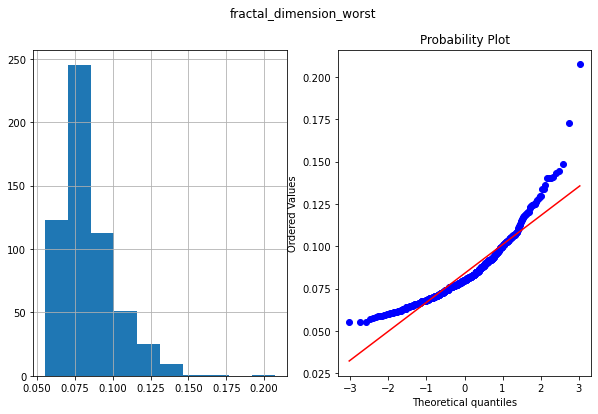

In [71]:
for column in X.columns:
    plot_data(X,column)

# skewed data to normal distribution

In [72]:
for feature in X.columns:
    if abs(X[feature].skew())>2:
        print(feature)
        X[feature]=np.sqrt(X[feature])

radius_se
smoothness_se
concavity_se
symmetry_se
fractal_dimension_se


Skewness of radius_mean is 0.9423795716730992


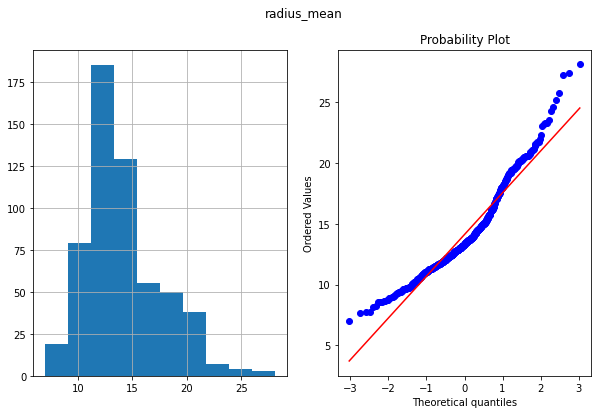

Skewness of texture_mean is 0.6504495420828159


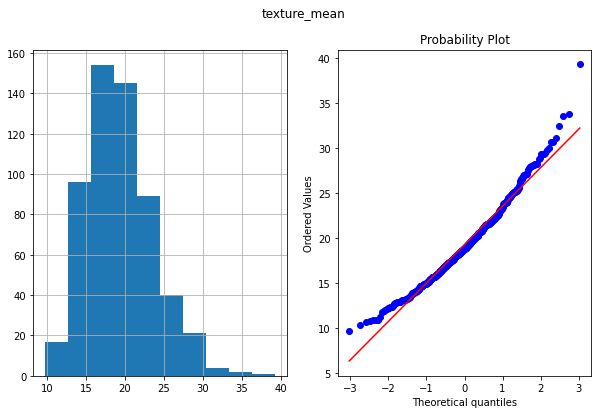

Skewness of smoothness_mean is 0.45632376481956155


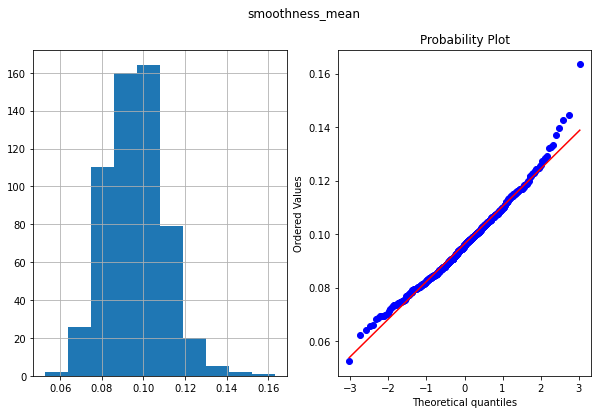

Skewness of compactness_mean is 1.1901230311980404


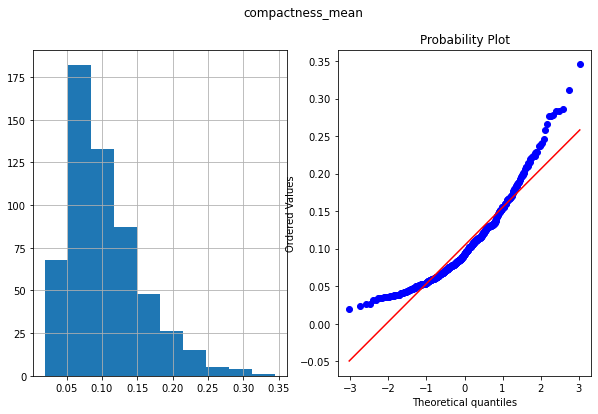

Skewness of concavity_mean is 1.4011797389486722


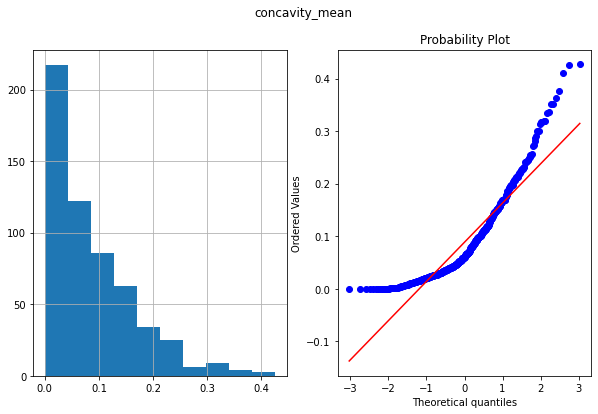

Skewness of symmetry_mean is 0.7256089733642002


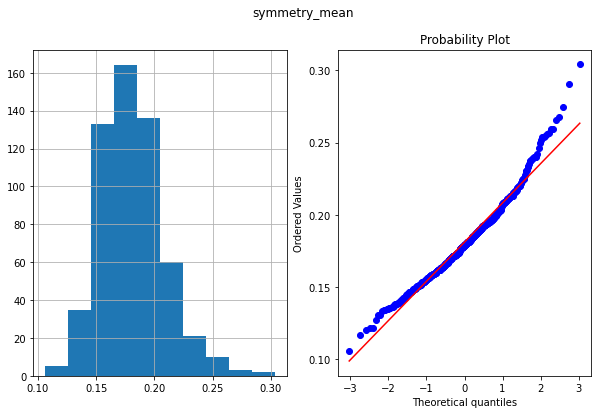

Skewness of fractal_dimension_mean is 1.3044888125755076


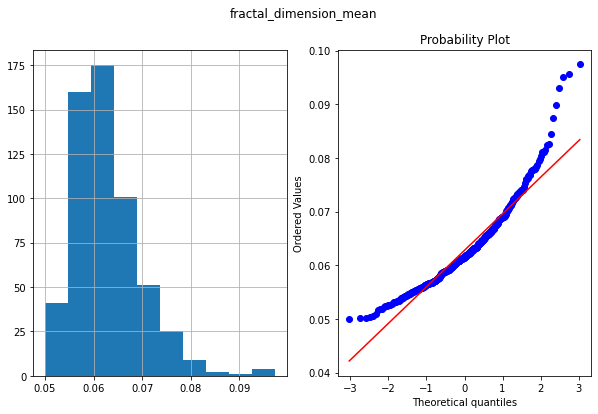

Skewness of radius_se is 1.4776556480454788


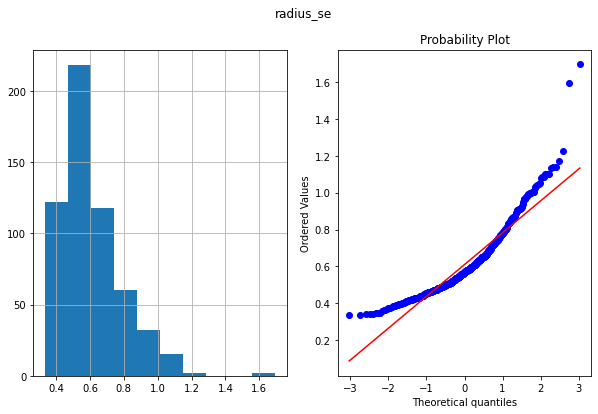

Skewness of texture_se is 1.646443808753053


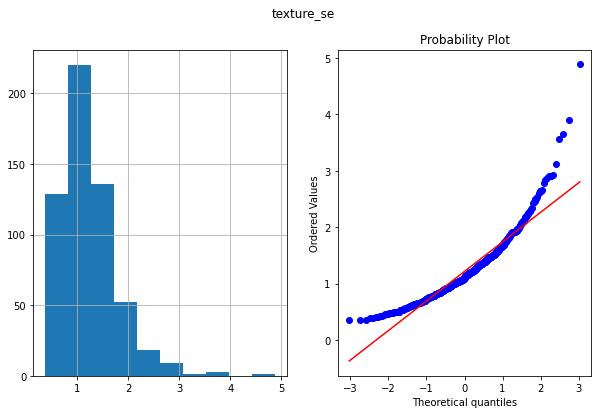

Skewness of smoothness_se is 1.2066406239032605


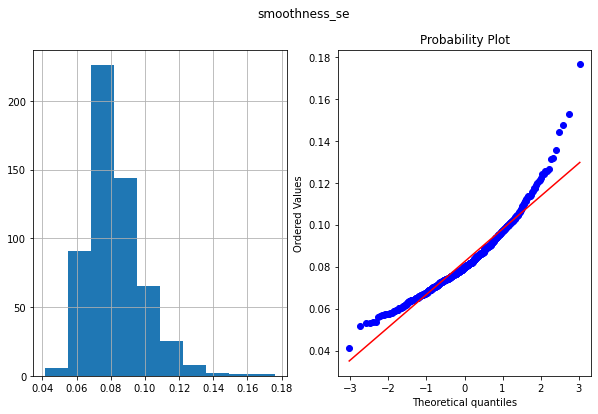

Skewness of compactness_se is 1.9022207096378565


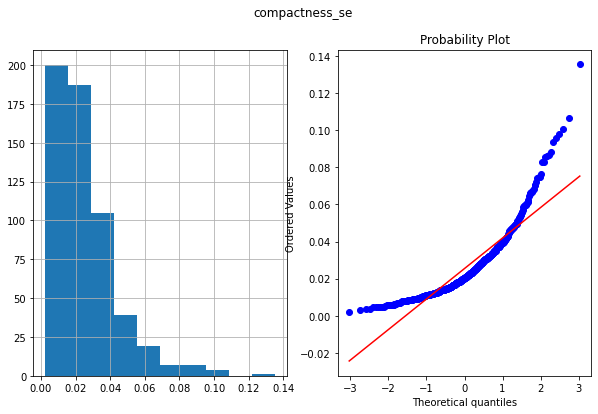

Skewness of concavity_se is 0.937891520530265


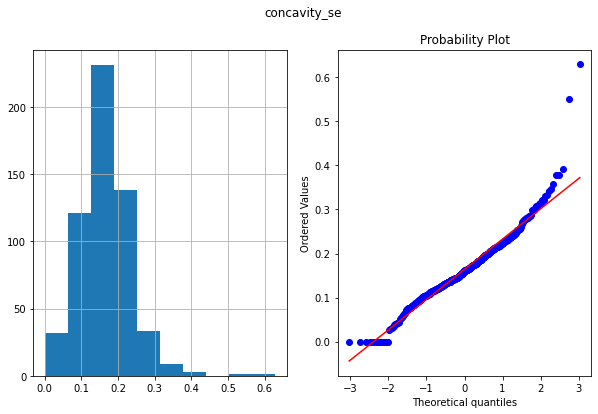

Skewness of concave points_se is 1.4446781446974788


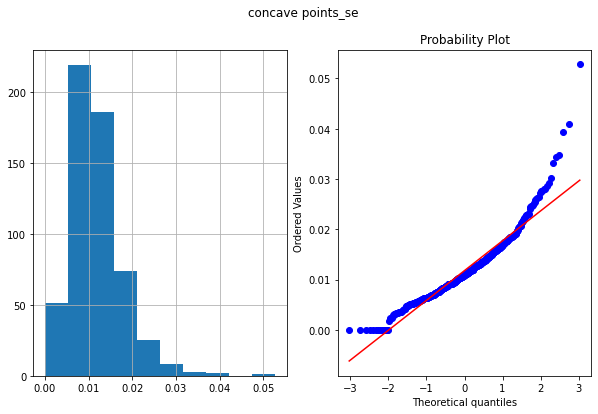

Skewness of symmetry_se is 1.3434116946920893


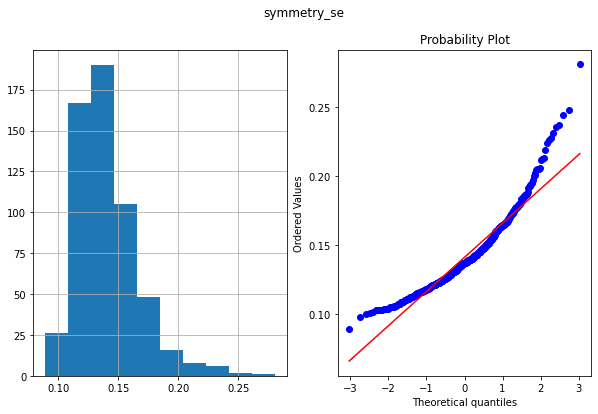

Skewness of fractal_dimension_se is 1.7658055380179496


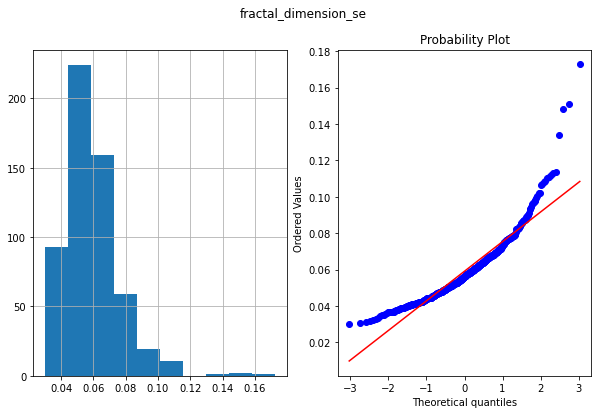

Skewness of smoothness_worst is 0.4154259962824678


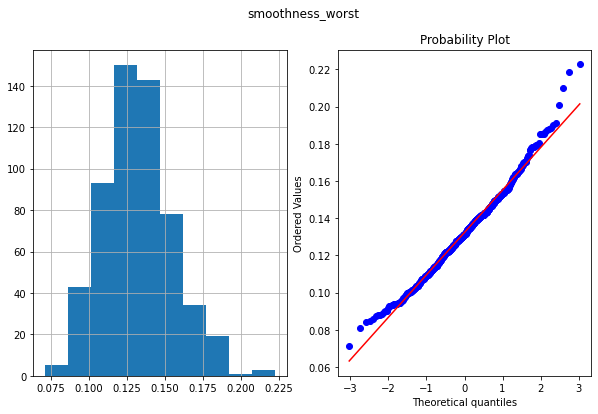

Skewness of compactness_worst is 1.4735549003297963


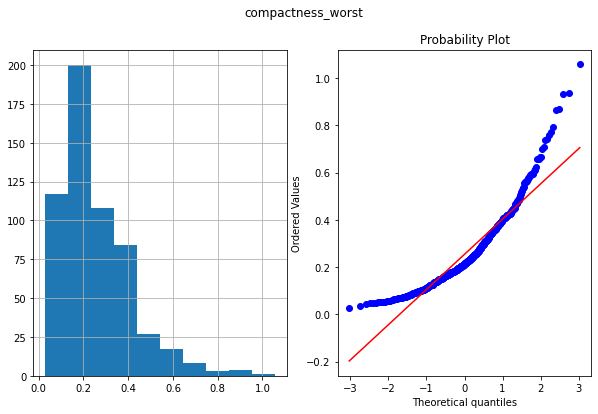

Skewness of concavity_worst is 1.1502368219460262


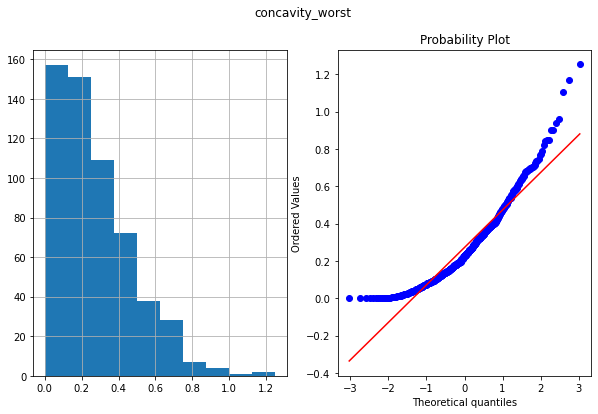

Skewness of symmetry_worst is 1.4339277651893279


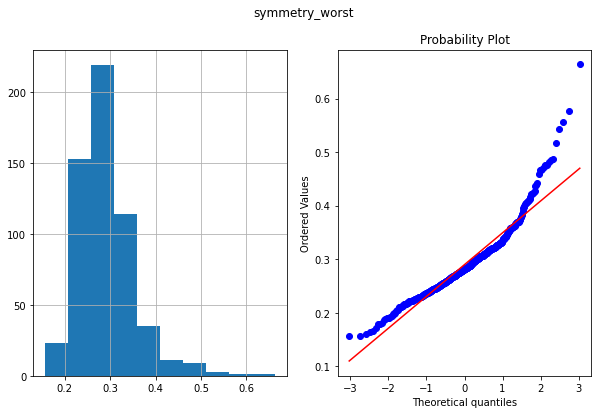

Skewness of fractal_dimension_worst is 1.6625792663955172


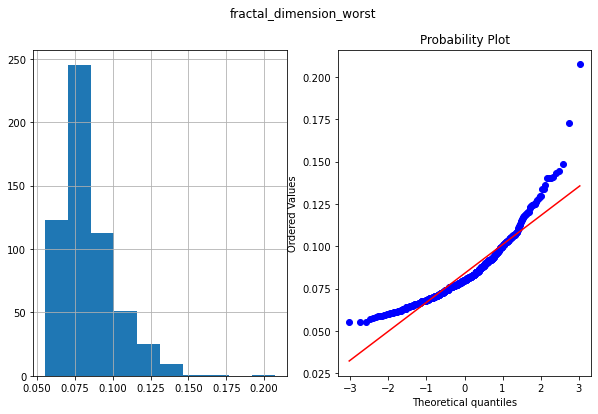

In [73]:
for column in X.columns:
    plot_data(X,column)

In [74]:
len(X.columns)

20

# Spliting train and test data

In [75]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=41)

In [76]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [77]:
y.value_counts()

0    357
1    212
Name: M, dtype: int64

# Model development

In [116]:
from tensorflow.keras import regularizers

In [81]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0008,beta_1=0.95)

In [131]:
model = Sequential()
model.add(Dense(100, input_dim=20, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.8))
model.add(Dense(100, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

In [132]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [133]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/100
13/13 [==============================] - 0s 30ms/step - loss: 0.9321 - accuracy: 0.5879 - val_loss: 0.4609 - val_accuracy: 0.8713
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.5965 - accuracy: 0.7111 - val_loss: 0.3180 - val_accuracy: 0.9415
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4872 - accuracy: 0.7789 - val_loss: 0.2391 - val_accuracy: 0.9474
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4497 - accuracy: 0.8090 - val_loss: 0.1882 - val_accuracy: 0.9591
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.3249 - accuracy: 0.8945 - val_loss: 0.1599 - val_accuracy: 0.9649
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.3334 - accuracy: 0.8869 - val_loss: 0.1409 - val_accuracy: 0.9708
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.2711 - accuracy: 0.9146 - val_loss: 0.1284 - val_accuracy: 0.9708
Epoch 8/100


13/13 [==============================] - 0s 19ms/step - loss: 0.0946 - accuracy: 0.9774 - val_loss: 0.0747 - val_accuracy: 0.9766
Epoch 59/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1110 - accuracy: 0.9724 - val_loss: 0.0739 - val_accuracy: 0.9766
Epoch 60/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0927 - accuracy: 0.9774 - val_loss: 0.0745 - val_accuracy: 0.9766
Epoch 61/100
13/13 [==============================] - 0s 13ms/step - loss: 0.1050 - accuracy: 0.9749 - val_loss: 0.0760 - val_accuracy: 0.9766
Epoch 62/100
13/13 [==============================] - 0s 10ms/step - loss: 0.1169 - accuracy: 0.9648 - val_loss: 0.0780 - val_accuracy: 0.9766
Epoch 63/100
13/13 [==============================] - 0s 10ms/step - loss: 0.1187 - accuracy: 0.9648 - val_loss: 0.0788 - val_accuracy: 0.9766
Epoch 64/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1058 - accuracy: 0.9724 - val_loss: 0.0806 - val_accuracy: 0.9766
Epoch 65/100
1

# ploting loss and accuracy for every epochs

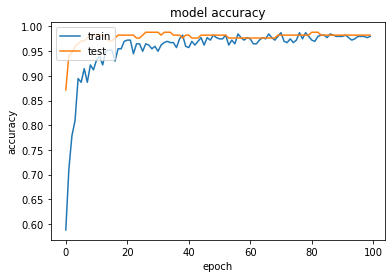

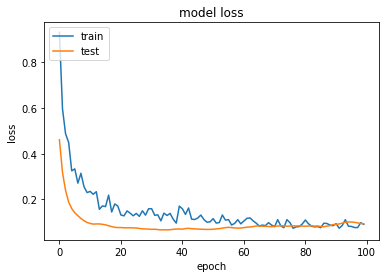

In [134]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Perfomence metrics

In [135]:
y_pred=model.predict(X_test)

In [136]:
y_pred = (y_pred > 0.5)

## Test accuracy

In [137]:
accuracy_score(y_test,y_pred)

0.9824561403508771

In [138]:
confusion_matrix(y_test,y_pred)

array([[109,   1],
       [  2,  59]], dtype=int64)

## Test f1_score

In [139]:
f1_score(y_test,y_pred)

0.9752066115702478

In [140]:
y_pred=model.predict(X_train)

## Train Accuracy

In [141]:
y_pred = (y_pred > 0.5)

In [142]:
accuracy_score(y_train,y_pred)

0.9874371859296482

In [143]:
confusion_matrix(y_train,y_pred)

array([[246,   1],
       [  4, 147]], dtype=int64)

# Train f1 score

In [144]:
f1_score(y_train,y_pred)

0.983277591973244